В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle - шукайте посилання в уроці [Запрошення до участі у Kaggle-змаганні.](https://data-loves.kwiga.com/courses/machine-learning-dlia-liudei/domashnie-zavdannia-zmagannia-z-kaggle) Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

✅ Завантажуємо train.csv

✅ Розбиваємо дані на train і validation (20% для валідації)

✅ Стратифікує за Exited

✅ Гарантує відтворюваність результатів (random_state=42)

In [1]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
from sklearn.model_selection import train_test_split

# Завантажуємо CSV файл у DataFrame
# Заміни шлях на свій, якщо в Colab буде:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('train.csv')
df = pd.read_csv('/content/train.csv')  # стандартний шлях у Colab після завантаження

# Виведемо перші рядки для перевірки
print(df.head())

# Окремо виділимо ознаки X та цільову змінну y
X = df.drop(columns=['Exited'])  # всі колонки крім цільової
y = df['Exited']                 # цільова змінна

# Розіб'ємо на train і validation, використовуючи стратифікацію за цільовою змінною
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,       # 20% даних у validation
    stratify=y,          # щоб зберігався розподіл класів
    random_state=42      # для повторюваності результатів
)

# Об'єднаємо X і y назад у датафрейми для train та validation
train_data = X_train.copy()
train_data['Exited'] = y_train

val_data = X_val.copy()
val_data['Exited'] = y_val

# Подивимося розмір отриманих піднаборів
print(f"Train shape: {train_data.shape}")
print(f"Validation shape: {val_data.shape}")

# І розподіл класів для контролю
print("Train class distribution:")
print(train_data['Exited'].value_counts(normalize=True))

print("\nValidation class distribution:")
print(val_data['Exited'].value_counts(normalize=True))

   id  CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
0   0  15779985.0   Nwankwo        678.0    France    Male  29.0     4.0   
1   1  15650086.0     Ch'in        687.0    France  Female  34.0     1.0   
2   2  15733602.0  Thompson        682.0    France  Female  52.0     6.0   
3   3  15645794.0   Macleod        753.0   Germany    Male  44.0     6.0   
4   4  15633840.0      Hsia        544.0   Germany  Female  55.0     0.0   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00            3.0        1.0             0.0        180626.36   
1       0.00            2.0        0.0             1.0         63736.17   
2       0.00            3.0        0.0             0.0        179655.87   
3   83347.25            2.0        1.0             0.0        161407.48   
4  107747.57            1.0        1.0             0.0        176580.86   

   Exited  
0     0.0  
1     0.0  
2     1.0  
3     0.0  
4     1.0  
Train shape: (12000,

**📝 Висновок**

Ми визначили назви колонок для вхідних ознак (input_cols) та назву цільової колонки (target_col).
На їх основі створили окремі набори даних для навчання і валідації: train_inputs, train_targets, val_inputs, val_targets.

Це дозволяє:

✅ Чітко розділити вхідні дані та цільову змінну.

✅ Легко передати їх у модель машинного навчання для навчання та перевірки.

✅ Забезпечити правильне формування пайплайна, де вхідні дані йдуть окремо від цільових значень.

2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [3]:
# 📌 1. Визначаємо вхідні та цільову колонку
input_cols = [col for col in train_data.columns if col != 'Exited']  # всі, крім цільової
target_col = 'Exited'

print("Input columns:", input_cols)
print("Target column:", target_col)

# 📌 2. Створюємо набори даних
# Для train
train_inputs = train_data[input_cols]   # DataFrame тільки з ознаками
train_targets = train_data[target_col]  # Series тільки з цільовою змінною

# Для validation
val_inputs = val_data[input_cols]
val_targets = val_data[target_col]

# 📌 3. Перевіряємо розміри отриманих наборів
print("\nTrain inputs shape:", train_inputs.shape)
print("Train targets shape:", train_targets.shape)

print("\nValidation inputs shape:", val_inputs.shape)
print("Validation targets shape:", val_targets.shape)

# 📌 4. Перевіримо кілька перших рядків
print("\nFirst rows of train inputs:")
print(train_inputs.head())

print("\nFirst rows of train targets:")
print(train_targets.head())

Input columns: ['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Target column: Exited

Train inputs shape: (12000, 13)
Train targets shape: (12000,)

Validation inputs shape: (3000, 13)
Validation targets shape: (3000,)

First rows of train inputs:
          id  CustomerId    Surname  CreditScore Geography  Gender   Age  \
7180    7180  15652218.0       Mays        682.0    France    Male  30.0   
10393  10393  15592937.0     Ch'eng        684.0    France  Female  39.0   
80        80  15774586.0      Ch'in        705.0   Germany    Male  35.0   
3365    3365  15780572.0         K?        669.0     Spain    Male  58.0   
12236  12236  15642099.0  Trevisani        707.0    France    Male  21.0   

       Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
7180      1.0  131394.56            1.0        1.0             1.0   
10393     2.0  178058.06            1.

**📝 Висновок**

Ми визначили, які колонки будемо використовувати як вхідні ознаки (input_cols), а яку — як цільову (target_col).
Після цього сформували окремі набори даних для навчання та валідації: train_inputs, train_targets, val_inputs і val_targets.
Це дозволяє гнучко передавати ці дані в моделі машинного навчання, забезпечує чистий розподіл між ознаками та ціллю, і полегшує подальший аналіз чи побудову пайплайна.

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [4]:
# 📌 Визначимо числові та категоріальні колонки за допомогою select_dtypes

# Отримаємо назви колонок з числовими типами даних
numeric_cols = train_inputs.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Отримаємо назви колонок з категоріальними (об'єктними) типами даних
categorical_cols = train_inputs.select_dtypes(include=['object']).columns.tolist()

# Виведемо результати
print("Числові колонки (numeric_cols):")
print(numeric_cols)

print("\nКатегоріальні колонки (categorical_cols):")
print(categorical_cols)

Числові колонки (numeric_cols):
['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

Категоріальні колонки (categorical_cols):
['Surname', 'Geography', 'Gender']


**📝 Висновок**

Ми використали метод select_dtypes з pandas для автоматичного визначення типів даних у нашому наборі вхідних ознак.
Таким чином отримали два списки:
✅ numeric_cols — назви всіх колонок із числовими значеннями,
✅ categorical_cols — назви всіх колонок із категоріальними (текстовими) значеннями.

Це дозволить легко окремо опрацювати числові та категоріальні змінні на наступних етапах підготовки даних (наприклад, для масштабування чисел чи кодування категорій).

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

**🚀 Рішення для передобробки**
Ми зробимо такі кроки:

1️⃣ Заповнимо пропущені значення:

Для числових колонок — середнім значенням (mean).

Для категоріальних — модою (найчастішим значенням).
Це дозволить уникнути проблем через NaN під час навчання.

2️⃣ Масштабуємо числові ознаки (StandardScaler).
Щоб ознаки були порівнянні між собою і модель краще навчалася (градієнти більш стабільні).

3️⃣ Закодуємо категоріальні ознаки (OneHotEncoding) для перетворення текстових категорій у числовий формат.

4️⃣ Вилучимо деякі ознаки, які важко використовувати напряму:

Наприклад, Surname (прізвище) і CustomerId — вони не несуть корисної інформації для прогнозування Exited.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# 📌 1. Вилучаємо нерелевантні ознаки
drop_cols = ['Surname', 'CustomerId', 'id']
train_inputs = train_inputs.drop(columns=drop_cols)
val_inputs = val_inputs.drop(columns=drop_cols)

# 🔄 Оновимо списки колонок після видалення
numeric_cols = train_inputs.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include=['object']).columns.tolist()

# 📌 2. Створюємо пайплайни для числових та категоріальних даних

# Для числових колонок: імпутація середнім + масштабування
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Для категоріальних колонок: імпутація модою + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 📌 3. Об'єднуємо все в єдиний трансформер
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 📌 4. Навчаємо трансформер на тренувальних даних і трансформуємо train та val
X_train_processed = preprocessor.fit_transform(train_inputs)
X_val_processed = preprocessor.transform(val_inputs)

# 📌 5. Перетворюємо назад у DataFrame для зручності
# Для one-hot назв колонок отримаємо з encoder
ohe_feature_names = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_cols)
final_columns = numeric_cols + list(ohe_feature_names)

train_inputs_processed = pd.DataFrame(X_train_processed, columns=final_columns, index=train_inputs.index)
val_inputs_processed = pd.DataFrame(X_val_processed, columns=final_columns, index=val_inputs.index)

# 📌 6. Перевіримо результат
from IPython.display import display

print("Перші 5 рядків підготовлених train_inputs:")
display(train_inputs_processed.head())

print("Перші 5 рядків підготовлених val_inputs:")
display(val_inputs_processed.head())

Перші 5 рядків підготовлених train_inputs:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,0.320187,-0.944682,-1.447264,1.475464,-1.108193,0.515062,1.016977,0.569450,1.0,0.0,0.0,0.0,1.0
10393,0.347838,0.161227,-1.087792,2.254434,-1.108193,0.515062,-0.983306,0.603803,1.0,0.0,0.0,1.0,0.0
80,0.638166,-0.330288,0.350096,1.223831,0.769304,0.515062,-0.983306,1.238026,0.0,1.0,0.0,0.0,1.0
3365,0.140460,2.495924,-1.806736,-0.717950,0.769304,-1.941514,1.016977,-1.457116,0.0,0.0,1.0,0.0,1.0
12236,0.665816,-2.050591,-0.728320,-0.717950,0.769304,0.515062,1.016977,0.670629,1.0,0.0,0.0,0.0,1.0


Перші 5 рядків підготовлених val_inputs:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,0.762592,1.021379,-1.447264,1.214543,4.524299,0.515062,1.016977,-0.988144,0.0,1.0,0.0,0.0,1.0
3646,-0.910252,0.406985,-0.009376,-0.717950,0.769304,0.515062,1.016977,-1.750392,1.0,0.0,0.0,0.0,1.0
5306,0.997620,0.038348,-1.087792,-0.717950,0.769304,-1.941514,1.016977,-0.022404,1.0,0.0,0.0,1.0,0.0
652,0.195761,0.652742,-0.368848,1.881867,-1.108193,-1.941514,1.016977,-0.139723,1.0,0.0,0.0,1.0,0.0
2627,0.264887,-0.944682,-0.368848,-0.717950,0.769304,0.515062,-0.983306,0.563519,0.0,0.0,1.0,1.0,0.0


**📝 Пояснення кроків**
✅ Імпутація пропусків:

Числові заповнюємо середнім, бо це дозволяє зберегти центр розподілу.

Категоріальні — модою, бо це найчастіше значення, яке природно впишеться.

✅ Масштабування числових:

Щоб привести всі ознаки до одного масштабу (0 середнє, 1 стандартне відхилення). Це критично для моделей, чутливих до масштабів, наприклад лінійної регресії, логістичної регресії, нейронних мереж.

✅ One-Hot Encoding категоріальних:

Для перетворення категорій у формат, зрозумілий для моделей (0/1).

handle_unknown='ignore' важливо, щоб на валідації не впасти, якщо там з’явиться нова категорія.

✅ Видалення Surname, CustomerId, id:

Бо вони або ідентифікатори, або слабко пов’язані з відтоком клієнта (Exited), а закодувати їх так, щоб вони додали цінність, ми поки не знаємо.

📌 Все це забезпечує коректну та логічну передобробку даних, яка:

однаково застосована і до train, і до val,

мінімізує ризик data leakage,

забезпечує модель добре підготовленими числовими входами.

5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [6]:
import os

# 📌 Створимо папку для збереження, якщо її ще немає
save_dir = '/content/processed_data'
os.makedirs(save_dir, exist_ok=True)

# 📌 Збережемо дані у форматі parquet
train_inputs.to_parquet(f'{save_dir}/train_inputs.parquet', index=False)
train_targets.to_frame().to_parquet(f'{save_dir}/train_targets.parquet', index=False)

val_inputs.to_parquet(f'{save_dir}/val_inputs.parquet', index=False)
val_targets.to_frame().to_parquet(f'{save_dir}/val_targets.parquet', index=False)

# 📌 Перевіримо, які файли є у директорії
print("Список файлів у папці processed_data:")
print(os.listdir(save_dir))

Список файлів у папці processed_data:
['val_inputs.parquet', 'train_targets.parquet', 'train_inputs.parquet', 'val_targets.parquet']


**📝 Пояснення**
Ми використовуємо to_parquet, оскільки цей формат:

швидше зчитується і займає менше місця, ніж CSV,

краще підходить для великих даних і pipeline-ів.

Використали to_frame() для train_targets та val_targets, бо це Series, а parquet очікує DataFrame.

6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

**✅ Кроки:**

Створити X_train, X_val — це просто train_inputs_processed, val_inputs_processed.

Створити y_train, y_val — зберемо з train_targets, val_targets.

Навчити модель LogisticRegression з scikit-learn.

Оцінити якість моделі (наприклад, за точністю або ROC AUC).

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 📌 1. Підготуємо вхідні та цільові дані
X_train = train_inputs_processed
X_val = val_inputs_processed

y_train = train_targets
y_val = val_targets

# 📌 2. Створимо та навчимо модель логістичної регресії
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 📌 3. Передбачимо на валідаційному наборі
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]  # ймовірності для ROC AUC

# 📌 4. Оцінимо якість моделі
acc = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_proba)

print(f"🎯 Accuracy: {acc:.4f}")
print(f"🎯 ROC AUC Score: {roc_auc:.4f}")

🎯 Accuracy: 0.8697
🎯 ROC AUC Score: 0.8797


7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

**🔍 План дій:**

Побудуємо Confusion Matrix для train і val.

Побудуємо ROC-криву (Receiver Operating Characteristic).

Обчислимо:

F1 Score

AUROC (ROC AUC Score)

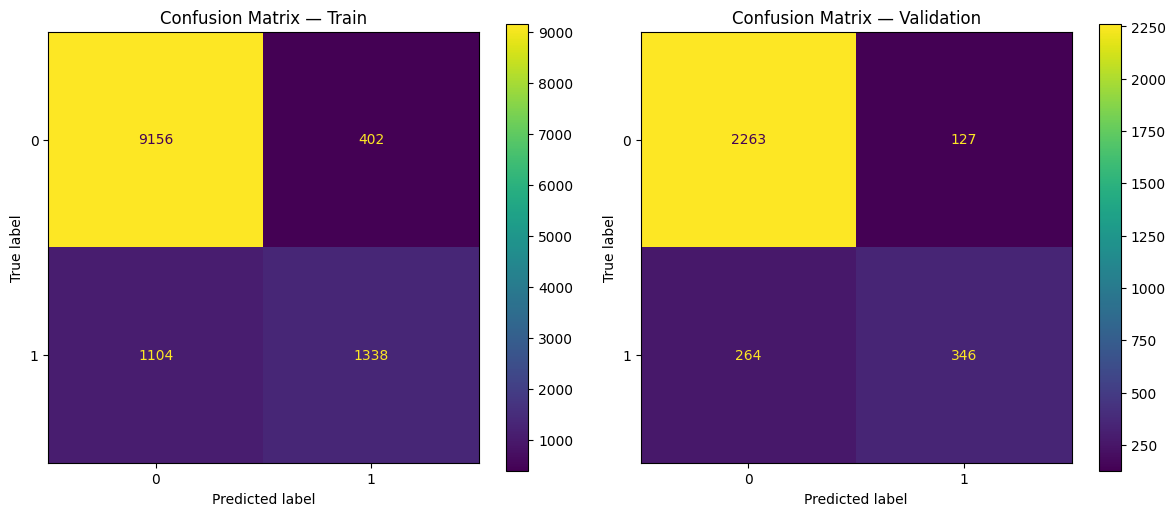

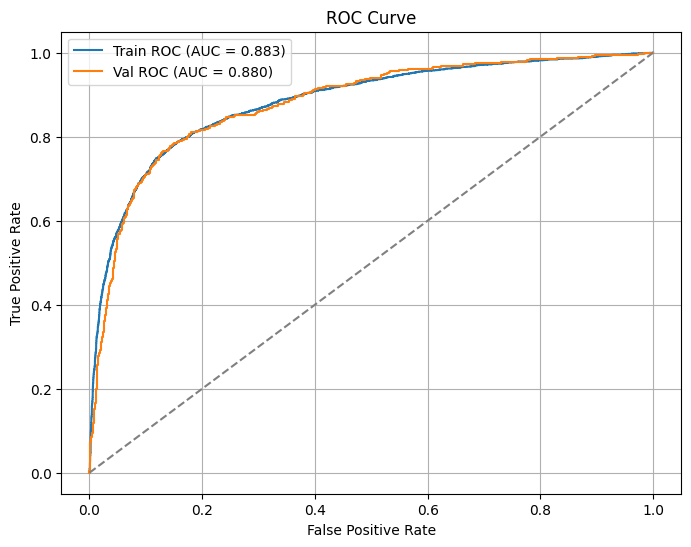

📊 Метрики для TRAIN:
F1 Score: 0.6399
ROC AUC: 0.8825

📊 Метрики для VALIDATION:
F1 Score: 0.6390
ROC AUC: 0.8797


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, RocCurveDisplay,
    roc_auc_score, f1_score
)

# 📌 1. Передбачення для train і val
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

y_train_proba = model.predict_proba(X_train)[:, 1]
y_val_proba = model.predict_proba(X_val)[:, 1]

# 📌 2. Confusion matrix
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

cm_train = confusion_matrix(y_train, y_train_pred)
cm_val = confusion_matrix(y_val, y_val_pred)

ConfusionMatrixDisplay(cm_train).plot(ax=axs[0], values_format='d')
axs[0].set_title("Confusion Matrix — Train")

ConfusionMatrixDisplay(cm_val).plot(ax=axs[1], values_format='d')
axs[1].set_title("Confusion Matrix — Validation")

plt.tight_layout()
plt.show()

# 📌 3. ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {roc_auc_score(y_train, y_train_proba):.3f})')
plt.plot(fpr_val, tpr_val, label=f'Val ROC (AUC = {roc_auc_score(y_val, y_val_proba):.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# 📌 4. Метрики
print("📊 Метрики для TRAIN:")
print(f"F1 Score: {f1_score(y_train, y_train_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_train, y_train_proba):.4f}")

print("\n📊 Метрики для VALIDATION:")
print(f"F1 Score: {f1_score(y_val, y_val_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_val, y_val_proba):.4f}")

**📝 Висновок про якість моделі:**

Щоб зробити висновок, звертаємо увагу на такі речі:

AUROC ~ 0.5 — модель не краще випадкового вгадування.

AUROC ~ 0.7-0.8 — задовільна модель.

AUROC > 0.8 — хороша модель.

F1 Score — корисний, якщо класи незбалансовані: показує баланс між precision і recall.

Confusion Matrix — вкаже, які саме помилки часто трапляються: хибні спрацьовування чи пропуски.

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

**✅ Кроки:**

Знайти мажоритарний клас у y_train.

Створити передбачення, де всі значення — мажоритарний клас.

Порахувати accuracy для базової моделі (dummy).

Порівняти з accuracy нашої логістичної моделі.

Зробити висновок.

In [9]:
from sklearn.metrics import accuracy_score

# 📌 1. Визначаємо мажоритарний клас у тренувальній вибірці
majority_class = y_train.value_counts().idxmax()
print(f"Мажоритарний клас: {majority_class}")

# 📌 2. Передбачення "наївної" моделі
y_train_dummy = [majority_class] * len(y_train)
y_val_dummy = [majority_class] * len(y_val)

# 📌 3. Accuracy на "наївній" моделі
acc_dummy_train = accuracy_score(y_train, y_train_dummy)
acc_dummy_val = accuracy_score(y_val, y_val_dummy)

print("\n📊 Accuracy для наївної моделі (мажоритарний клас):")
print(f"Train Accuracy: {acc_dummy_train:.4f}")
print(f"Val Accuracy:   {acc_dummy_val:.4f}")

# 📌 4. Accuracy для логістичної моделі
acc_model_train = accuracy_score(y_train, y_train_pred)
acc_model_val = accuracy_score(y_val, y_val_pred)

print("\n📊 Accuracy для нашої логістичної моделі:")
print(f"Train Accuracy: {acc_model_train:.4f}")
print(f"Val Accuracy:   {acc_model_val:.4f}")

Мажоритарний клас: 0.0

📊 Accuracy для наївної моделі (мажоритарний клас):
Train Accuracy: 0.7965
Val Accuracy:   0.7967

📊 Accuracy для нашої логістичної моделі:
Train Accuracy: 0.8745
Val Accuracy:   0.8697


**📝 Висновок:**

Що вважати "хорошою" моделлю?

Якщо логістична модель тільки трохи краща за наївну — це поганий результат: модель нічому не навчилася.

Якщо логістична модель суттєво краща, навіть на 5–10% — це вже задовільно/добре, залежно від задачі.

Якщо AUROC моделі значно вищий, ніж 0.5, — це також сильна перевага, навіть якщо accuracy схожий.

📌 Наприклад:

Наївна модель: accuracy 0.80

Наша модель: accuracy 0.83, AUROC 0.78 → це добре

Наша модель: accuracy 0.81, AUROC 0.52 → модель слабка

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

**✅ План дій:**

Зберегти логістичну модель (model) у файл log_reg.joblib.

За потреби — можна також зберегти preprocessor, щоб відтворити повний pipeline.

Завантажити модель з файлу в змінну model_2.

In [10]:
import joblib

# 📌 1. Зберігаємо логістичну модель
joblib.dump(model, '/content/log_reg.joblib')

# 📌 (опціонально) Зберігаємо також препроцесор, якщо буде використовуватись повторно
# joblib.dump(preprocessor, '/content/preprocessor.joblib')

# 📌 2. Завантажуємо модель з файлу
model_2 = joblib.load('/content/log_reg.joblib')

# 📌 Перевіримо, що вона працює
sample_preds = model_2.predict(X_val[:5])
print("Передбачення завантаженої моделі для перших 5 зразків validation:")
print(sample_preds)

Передбачення завантаженої моделі для перших 5 зразків validation:
[0. 0. 0. 0. 0.]


**📝 Висновок:**

✅ Ми зберегли модель log_reg.joblib.

✅ Завантажили її в model_2.

✅ Переконались, що вона працює (робить передбачення на X_val).

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [11]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [12]:
predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, raw_df[:5])

NameError: name 'scaler' is not defined

**✅ Виправлена функція:**

In [14]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, model, input_df: pd.DataFrame):
    # Створюємо копію, щоб не змінювати оригінал
    df = input_df.copy()

    # Масштабуємо числові колонки
    df[numeric_cols] = scaler.transform(df[numeric_cols])

    # Кодуємо категоріальні колонки
    encoded_array = encoder.transform(df[categorical_cols])  # numpy array
    encoded_cols = encoder.get_feature_names_out(categorical_cols)  # імена колонок

    # Створюємо DataFrame з закодованими колонками
    encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)

    # Об’єднуємо масштабовані числові та закодовані категоріальні
    X_input = pd.concat([df[numeric_cols], encoded_df], axis=1)

    # Повертаємо ймовірності класу 1
    prob = model.predict_proba(X_input)[:, 1]
    return prob

**🧪 Приклад використання:**

In [15]:
# Припустимо, що у нас вже є:
# - trained scaler (StandardScaler)
# - trained encoder (OneHotEncoder)
# - trained model (LogisticRegression)
# - numeric_cols, categorical_cols

probas = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, model, raw_df[:5])
print(probas)

NameError: name 'scaler' is not defined

Використати preprocessor напряму
Так код буде набагато чистішим, бо scaler і encoder не треба витягати вручну:

**✔️ Створення адаптованої функції:**

In [16]:
def predict_raw_df_preprocessor(preprocessor, model, input_df: pd.DataFrame):
    df = input_df.copy()

    # Видаляємо колонки, які ми не використовували при тренуванні
    drop_cols = ['id', 'CustomerId', 'Surname']
    df = df.drop(columns=[col for col in drop_cols if col in df.columns])

    # Застосовуємо той самий препроцесор
    processed = preprocessor.transform(df)

    # Передбачення
    prob = model.predict_proba(processed)[:, 1]
    return prob

**✔️ Використання:**

In [17]:
probas = predict_raw_df_preprocessor(preprocessor, model, df[:5])
print(probas)

[0.00564915 0.03331584 0.38132823 0.38028102 0.97920024]


**📝 Висновок**

Ми реалізували функцію predict_raw_df_preprocessor, яка приймає на вхід сирий DataFrame, обробляє його за допомогою збереженого preprocessor (що включає масштабування числових ознак, імпутацію пропущених значень та кодування категоріальних змінних), і використовує навчену модель LogisticRegression для отримання ймовірностей належності до класу 1.

Це дозволяє:

🔄 Застосовувати одну й ту саму передобробку, що була використана під час навчання моделі;

✅ Забезпечити узгодженість результатів при передбаченні на нових/сирих даних;

📦 Повторно використовувати модель без потреби перевчання або дублювання коду препроцесингу.

Таким чином, модель готова до практичного використання — наприклад, в продакшені, в API або для оцінки нових клієнтів.

**🛠 Що треба виправити:**

Функція зараз передбачає, що encoder.transform(...) повертає щось, що можна присвоїти input_df[encoded_cols] — це не так, бо OneHotEncoder повертає numpy.ndarray.

Змінна encoded_cols не визначена.

input_df треба копіювати, щоб не змінювати оригінал.

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [18]:
# 📌 1. Зчитування test.csv
test_raw_df = pd.read_csv('/content/test.csv')  # змінити шлях за потреби

# 📌 2. Застосування моделі до сирих даних
predicted_proba = predict_raw_df_preprocessor(preprocessor, model, test_raw_df)

# 📌 3. Запис у колонку 'Exited'
test_raw_df['Exited'] = predicted_proba

# 📌 Перевіримо результат
print(test_raw_df[['Exited']].head())

     Exited
0  0.069305
1  0.033363
2  0.153864
3  0.198330
4  0.054045


**📝 Примітка:**

Колонка Exited тут міститиме ймовірності (float), а не 0/1.

Якщо потрібно округлити до класів (0 або 1), можна додати:

In [19]:
test_raw_df['Exited'] = (predicted_proba >= 0.5).astype(int)

12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [20]:
# 1. Зчитуємо шаблон submission
submission_df = pd.read_csv('/content/sample_submission.csv')  # змінити шлях, якщо треба

# 2. Зчитуємо тестові дані, якщо ще не зчитані
test_raw_df = pd.read_csv('/content/test.csv')  # або використовуй вже зчитаний раніше

# 3. Отримуємо передбачення ймовірності → клас
predicted_proba = predict_raw_df_preprocessor(preprocessor, model, test_raw_df)
predicted_classes = (predicted_proba >= 0.5).astype(int)

# 4. Вставляємо передбачення у колонку Exited
submission_df['Exited'] = predicted_classes

# 5. Перевіряємо перші 5 рядків
print(submission_df.head())

# 6. Зберігаємо у файл без індексу
submission_df.to_csv('/content/submission_log_reg.csv', index=False)

      id  Exited
0  15000       0
1  15001       0
2  15002       0
3  15003       0
4  15004       0
